In [2]:
import pandas as pd
from pyextremes import EVA
import matplotlib.pyplot as plt

In [3]:
rf_data = pd.read_csv(r"C:\Users\admin\Desktop\ISPS\daily_rainfall.csv", header = None)
rf_values = rf_data.iloc[0].tolist()
date_range = pd.date_range(start='1951-01-01', end='2023-12-31')
rf_datetime = pd.Series(rf_values, index = date_range)


In [11]:
model = EVA(rf_datetime)
model.get_extremes(method="BM",  block_size="365.2425D")

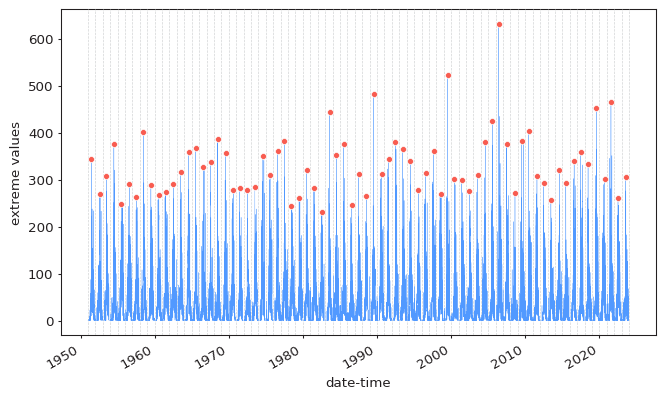

In [6]:
model.plot_extremes()
plt.show()

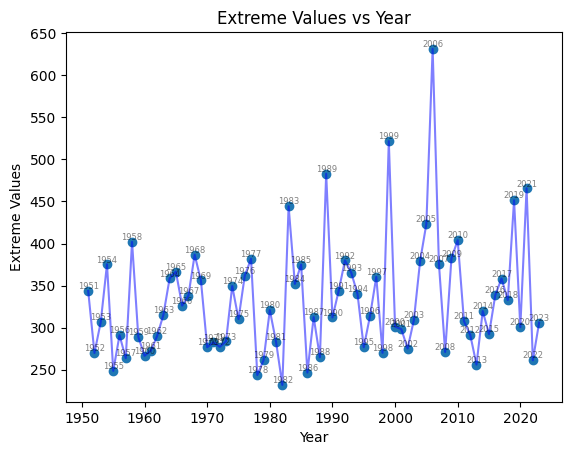

In [7]:
extremes = model.extremes

extremes_years = list(range(1951, 2024))
for year, extreme in zip(extremes_years, extremes):
    plt.text(year, extreme, str(year), fontsize=6, ha='center', va='bottom', color='black', alpha=0.5)

plt.scatter(extremes_years, extremes)
plt.plot(extremes_years, extremes, linestyle='-', color='blue', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Extreme Values')
plt.title('Extreme Values vs Year')

plt.show()


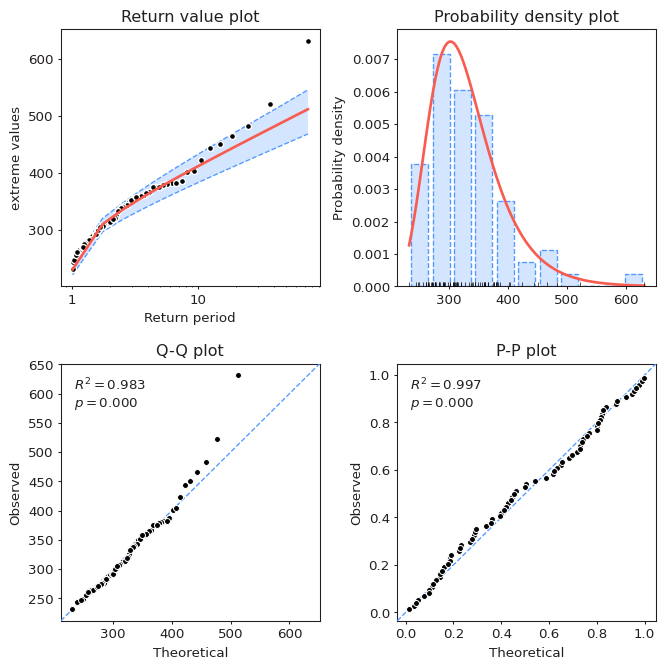

In [13]:
model.fit_model()
model.plot_diagnostic(alpha=0.95)

# Display the plots
plt.show()


In [30]:
pars  =  model.model.distribution.mle_parameters
pars


{'loc': 302.171758679314, 'scale': 48.77830112937107}